## Лабораторная работа №1 | Вариант 6

Выполнил: Головенко Анатолий М8О-212Б-22

### 1. Numpy

In [34]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [35]:
matr = np.eye(3)
matr

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [36]:
np.diag([1,2,3,4], k=-1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

In [37]:
# 1) 9
# 2) 10

4. Как найти самое часто встречаемое значение между двумя массивами?

In [38]:
arr1 = np.array([1, 2, 3, 4, 5, 3])
arr2 = np.array([3, 4, 4, 5, 6, 3])

combined = np.concatenate((arr1, arr2))

unique, counts = np.unique(combined, return_counts=True)

max_index = np.argmax(counts)

most_common_value = unique[max_index]
most_common_value

3

5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [39]:
np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [40]:
lst = np.arange(10)
lst

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [41]:
lst_2 = np.sort(np.random.random(10))
lst_2

array([0.02159597, 0.0394005 , 0.14624402, 0.18491889, 0.18588255,
       0.37223389, 0.43955142, 0.44167773, 0.4484152 , 0.74518621])

8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [42]:
rand_matr = np.random.rand(10, 2)
print(rand_matr)
r = np.sqrt(rand_matr[:, 0] ** 2 + rand_matr[:, 1] ** 2)
theta = np.arctan2(rand_matr[:, 1], rand_matr[:, 0])

# print(r)
# print(theta)

new_coord = np.column_stack((r, theta))
print(new_coord)

[[0.23101549 0.10151187]
 [0.10934975 0.16755239]
 [0.34887344 0.77814227]
 [0.00588806 0.23921187]
 [0.96639805 0.37586888]
 [0.885468   0.90123981]
 [0.34775081 0.90922811]
 [0.68201179 0.2418078 ]
 [0.9945896  0.58957356]
 [0.56284624 0.26836665]]
[[0.25233474 0.41401738]
 [0.20007791 0.99257436]
 [0.85277082 1.1493225 ]
 [0.23928433 1.54618686]
 [1.03691977 0.3709339 ]
 [1.26344243 0.79422523]
 [0.97346104 1.20549435]
 [0.72360977 0.34072319]
 [1.15620303 0.53509431]
 [0.62355157 0.44491821]]


9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [43]:
pixel_dtype = np.dtype([
    ('x', np.int32),        # координата x
    ('y', np.int32),        # координата y
    ('r', np.uint8),        # значение красного канала
    ('g', np.uint8),        # значение зеленого канала
    ('b', np.uint8)         # значение синего канала
])

pixels = np.array([
    (10, 20, 255, 0, 0),
    (30, 40, 0, 255, 0),
    (50, 60, 0, 0, 255),
    (70, 80, 255, 255, 0),
    (90, 100, 255, 255, 255)
], dtype=pixel_dtype)

print(pixels)
print(pixels['r'])

[(10,  20, 255,   0,   0) (30,  40,   0, 255,   0)
 (50,  60,   0,   0, 255) (70,  80, 255, 255,   0)
 (90, 100, 255, 255, 255)]
[255   0   0 255 255]


10. Как конвертировать тип массив от float32 в int32 in place?

In [44]:
arr = np.array([
    67.9,
    1892.0,
    12.4
], dtype=np.float32)
print(arr)

arr = arr.astype(np.int32)#, copy=False)

print(arr)
print(arr.dtype)

[  67.9 1892.    12.4]
[  67 1892   12]
int32


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [45]:
import pandas as pd

In [46]:
# Load dataset here
df = pd.read_csv('student_perfomance.csv')

In [47]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


1. Посчитайте среднее кол-во часов уделяемое на сон студентами

In [48]:
df['Sleep_Hours'].mean()

7.029060087785682

2. Сколько процентов студентов посещают внеклассовые активности?

In [49]:
df[df['Extracurricular_Activities'] == 'Yes'].shape[0] / df.shape[0] * 100

59.60345088542455

3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

In [50]:
gender_df = df.groupby(['Gender'])['Exam_Score'].mean()
gender_df.head()

,Exam_Score
Gender,
Female,67.244898
Male,67.228894


4. Выведите 25 и 75 перцентили времени сна студентов

In [51]:
sleep = df['Sleep_Hours'].sort_values()
np.percentile(sleep, 25), np.percentile(sleep, 75)

(6.0, 8.0)

5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [52]:
percentile_25 = df['Sleep_Hours'].quantile(0.25)
percentile_75 = df['Sleep_Hours'].quantile(0.75)


low_sleep_group = df[df['Sleep_Hours'] <= percentile_25]  # Меньше 25 перцентиля
high_sleep_group = df[df['Sleep_Hours'] >= percentile_75] # Больше 75 перцентиля

low_sleep_mean = low_sleep_group['Exam_Score'].mean()
high_sleep_mean = high_sleep_group['Exam_Score'].mean()

print(f"Средний балл у тех, кто спит меньше (≤ 25 перцентиля): {low_sleep_mean}")
print(f"Средний балл у тех, кто спит больше (≥ 75 перцентиля): {high_sleep_mean}")


Средний балл у тех, кто спит меньше (≤ 25 перцентиля): 67.28109243697479
Средний балл у тех, кто спит больше (≥ 75 перцентиля): 67.18704746580853


6. Влияет ли физическая активность на результаты экзамена?

In [53]:
physic = df.groupby(['Physical_Activity'])['Exam_Score'].mean()
physic

,Exam_Score
Physical_Activity,
0,67.521739
1,66.969121
2,67.185003
3,67.196071
4,67.313016
5,67.603878
6,68.093750


7. Правда ли, что слуденты, чьи родители имеют высшее образование, сдают экзамены лучше, чем остальные?

In [54]:
# parents = df[['Parental_Education_Level', 'Exam_Score']]
# parents = pd.get_dummies(parents, dtype=int)
parents = df.groupby(['Parental_Education_Level'])['Exam_Score'].mean()
parents.head()

,Exam_Score
Parental_Education_Level,
College,67.315737
High School,66.893577
Postgraduate,67.970881


8. Как влияет участие родителей на результаты экзаменов

In [55]:
parents_inf = df.groupby(['Parental_Involvement'])['Exam_Score'].mean()
parents_inf.head()

,Exam_Score
Parental_Involvement,
High,68.092767
Low,66.358265
Medium,67.098156


9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [56]:
parents_income = df.groupby(['Family_Income'])['Exam_Score'].mean()
parents_income.head()

,Exam_Score
Family_Income,
High,67.842396
Low,66.848428
Medium,67.334959


10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с доходом ниже 25го перцентиля и отсутствием доступа к интернету

In [57]:
category_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
help = df['Family_Income'].map(category_mapping)

perc_25 = help.quantile(0.25)
perc_25 #=> Low

1.0

In [58]:
df[(df['Exam_Score'] > 70) & (df['Family_Income'] == 'Low') & (df['Internet_Access'] == 'No')].shape[0] \
/ df.shape[0]

0.002573028606023914

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

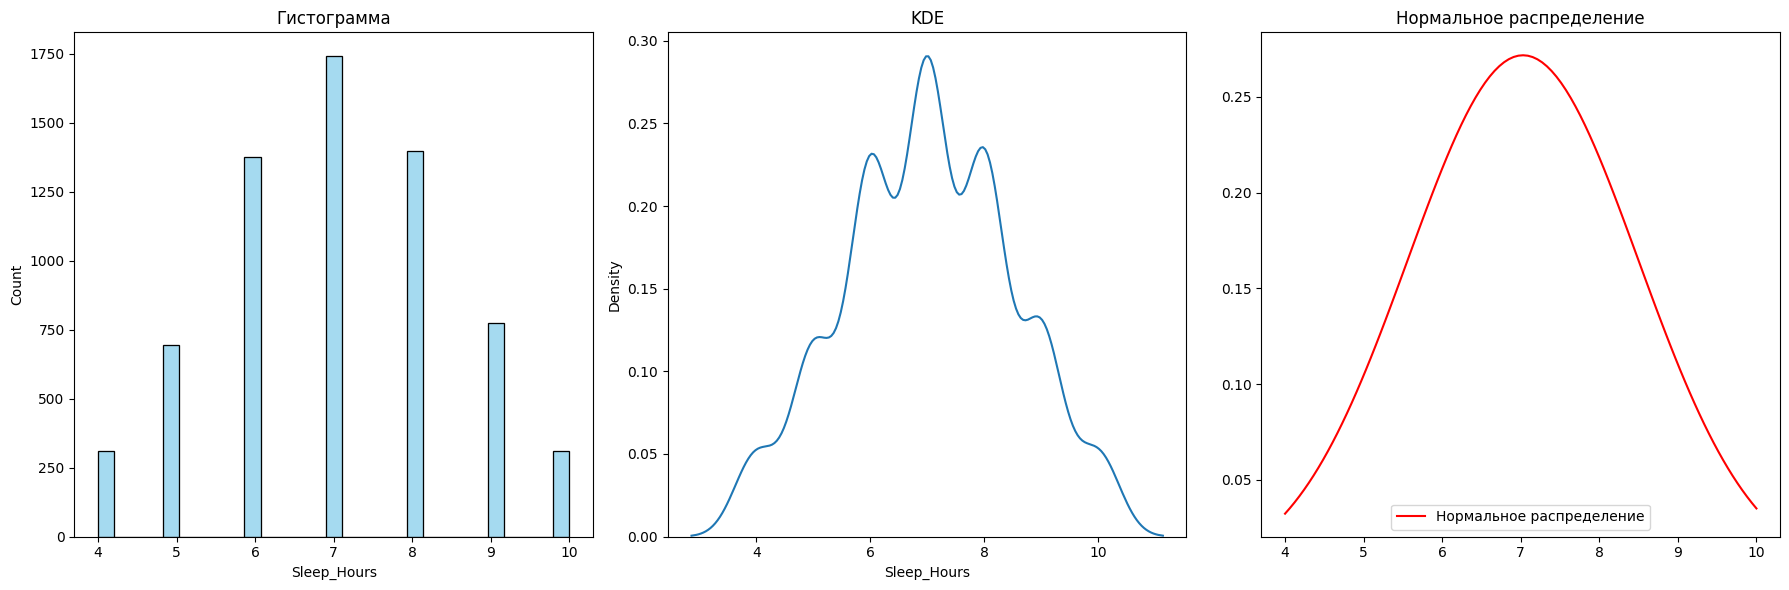

In [88]:
from scipy.stats import norm

data = df['Sleep_Hours']

mean = data.mean()
std = data.std()

x = np.linspace(data.min(), data.max(), 100)
y = norm.pdf(x, mean, std)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data, bins='auto', kde=False, ax=axes[0], color='skyblue')
axes[0].set_title("Гистограмма")


sns.kdeplot(data, ax=axes[1], bw_adjust=1.5)
axes[1].set_title("KDE")

sns.lineplot(x=x, y=y, ax=axes[2], label='Нормальное распределение', color='red')
axes[2].set_title("Нормальное распределение")

plt.tight_layout()
plt.show()


2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

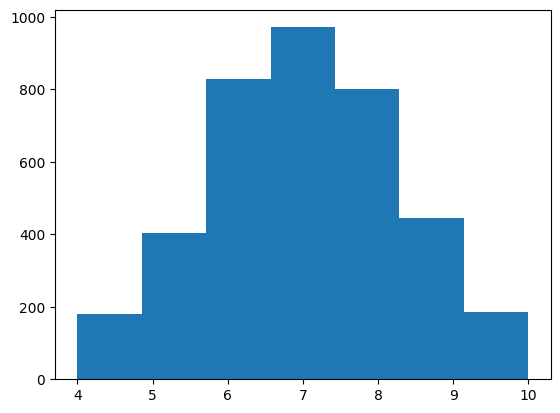

In [61]:
boys = df[df['Gender'] == 'Male']['Sleep_Hours']
plt.hist(boys, bins=7)#boys.unique().shape[0])
plt.show()

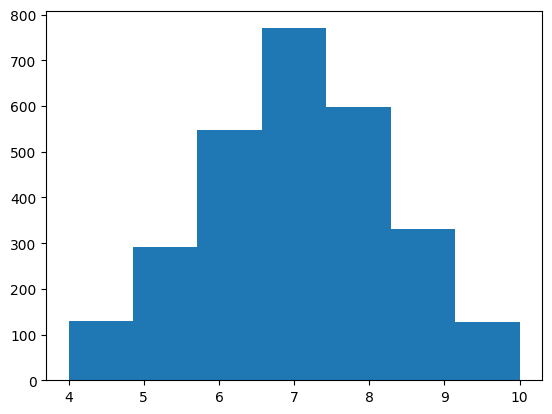

In [62]:
girls = df[df['Gender'] == 'Female']['Sleep_Hours']
plt.hist(girls, bins=7)#boys.unique().shape[0])
plt.show()

3. Как зависит результат конечного экзамена от результата первого экзамена

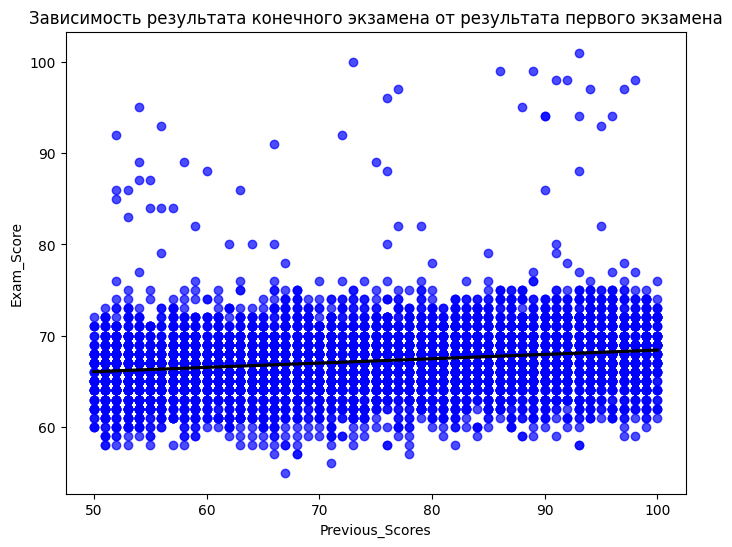

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Previous_Scores'], df['Exam_Score'], color='b', alpha=0.7)

plt.title('Зависимость результата конечного экзамена от результата первого экзамена')
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')

# Линия тренда для того, чтобы понять зависимость
sns.regplot(x='Previous_Scores', y='Exam_Score', data=df, scatter=False, color='black')

plt.show()

4. Постройте box plot отображающий распределение доходов семей детей сдавших экзамены на оценку ниже и выше 50 баллов

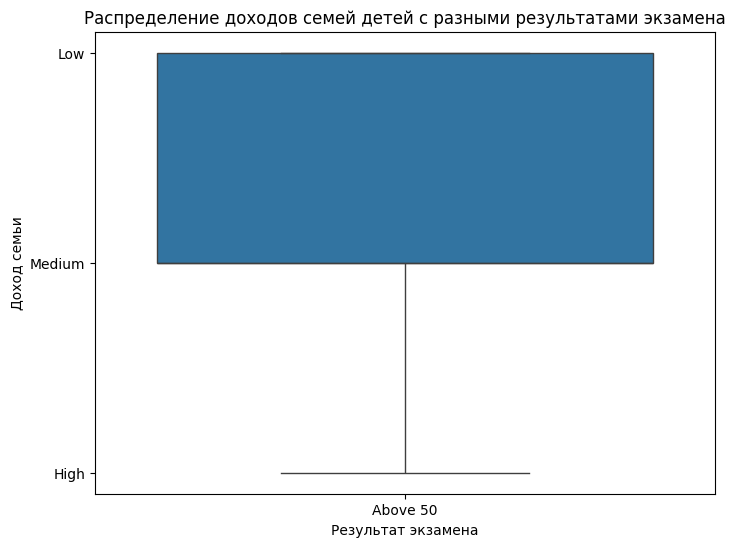

In [64]:
# Создадим новую колонку, которая будет содержать категории: 'Below 50' и 'Above 50'
df['Score_Group'] = df['Exam_Score'].apply(lambda x: 'Below 50' if x < 50 else 'Above 50')

# Построение box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Score_Group', y='Family_Income', data=df[df['Score_Group'] == 'Above 50'])

# Добавление заголовков
plt.title('Распределение доходов семей детей с разными результатами экзамена')
plt.xlabel('Результат экзамена')
plt.ylabel('Доход семьи')

# Отображение графика
plt.show()


5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

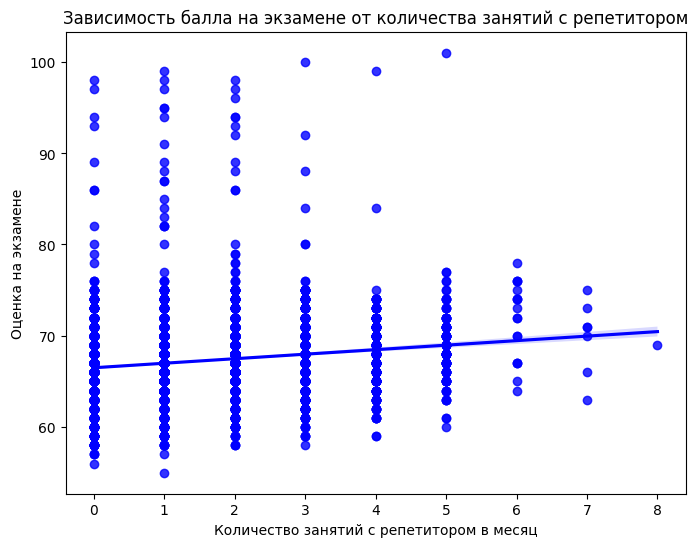

In [65]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Tutoring_Sessions', y='Exam_Score', data=df, scatter=True, color='b')
plt.title('Зависимость балла на экзамене от количества занятий с репетитором')
plt.xlabel('Количество занятий с репетитором в месяц')
plt.ylabel('Оценка на экзамене')
plt.show()

6. Как физическая активность влияет на успеваемость?

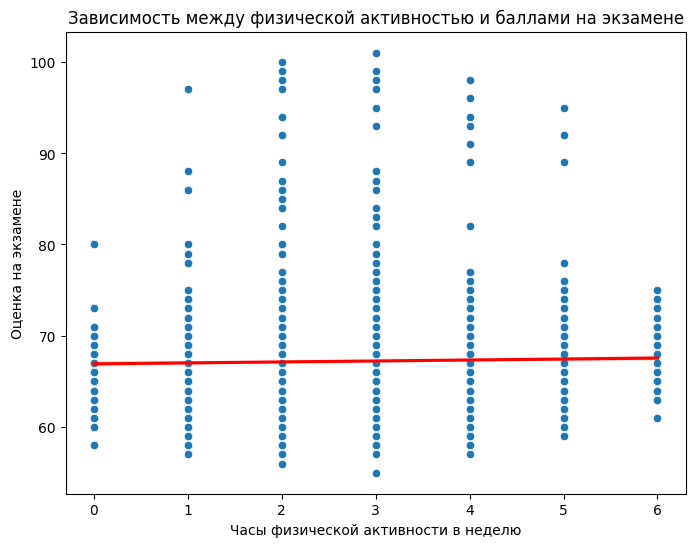

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Physical_Activity', y='Exam_Score', data=df)

# Линия тренда (опционально)
sns.regplot(x='Physical_Activity', y='Exam_Score', data=df, scatter=False, color='r')

plt.title('Зависимость между физической активностью и баллами на экзамене')
plt.xlabel('Часы физической активности в неделю')
plt.ylabel('Оценка на экзамене')
plt.show()

In [67]:
correlation = df['Physical_Activity'].corr(df['Exam_Score'])
print(f"Корреляция: {correlation}")

Корреляция: 0.027824436180257445


7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл

In [68]:
%matplotlib inline

In [69]:
import plotly.express as px

In [70]:
fig = px.scatter_3d(df,
                    x='Attendance',
                    y='Tutoring_Sessions',
                    z='Exam_Score',
                    color='Exam_Score',
                    color_continuous_scale='Viridis')

fig.show()